# Google Stock Price Prediction using Recurrent Neural Network

**In this notebook, I have predicted the stock price of Google using Recurrent Neural Network.**<br> 
<br>
The Dataset is taken from [Super Data Science Website](https://www.superdatascience.com/deep-learning/). You can Learn more about Recurrent Neural Network (RNN) [Here](https://www.superdatascience.com/the-ultimate-guide-to-recurrent-neural-networks-rnn/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Importing the Training Set
train_data_df = pd.read_csv('Data/Google_Stock_Price_Train.csv')

In [5]:
train_data_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train_df = train_data_df['Open'].values

In [11]:
train_df.reshape(-1,1)

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

**Feature Scaling**

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
sc = MinMaxScaler(feature_range=(0,1))

In [15]:
train_df_scaled = sc.fit_transform(train_df.reshape(-1,1))

In [17]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_df_scaled[i-60:i, 0])
    y_train.append(train_df_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [20]:
# Initialising the RNN
regressor = Sequential()


In [21]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [22]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [24]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [25]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [26]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0531
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

In [28]:
# Part 3 - Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Data/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [29]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((train_data_df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

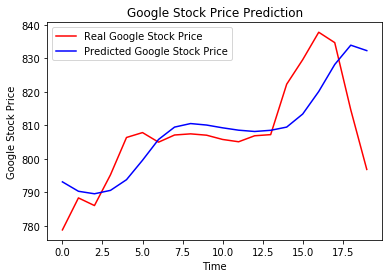

In [30]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()